<a href="https://colab.research.google.com/github/AKslugger/Carona-Forecasting/blob/main/Carona_pandemic_Forecasting_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/owid-covid-data.xlsx')

In [2]:
#Questions
'''•Which country/state is having highest number of cases?
•Which country/state is having lowest number of cases?
•Which country/state is having lowest number of deaths?
•Which country/state is having highest number of deaths?
•Which country/state is most vaccinated?
'''

'•Which country/state is having highest number of cases?\n•Which country/state is having lowest number of cases?\n•Which country/state is having lowest number of deaths?\n•Which country/state is having highest number of deaths?\n•Which country/state is most vaccinated?\n'

In [3]:
#not countries
a=['Asia','Africa','Europe','International','European Union','North America','South America','World']

In [7]:
#removing rows with continents, world, international etc. Those which are not countries
for i in list(df[df['location'].isin(a)].index):
    df.drop([i],inplace=True)

#sorting the dataframe according to the latest date of the Data set
d=df[df['date']=='2021-06-07']

In [8]:
#country with highest number of cases
list(d[d['total_cases']==max(d.total_cases)]['location'])

['United States']

In [9]:
#country with least number of cases
list(d[d['total_cases']==min(d.total_cases)]['location'])

['Micronesia (country)']

In [10]:
#country with least number of deaths
list(d[d['total_deaths']==min(d.total_deaths)]['location'])

['Bhutan', 'Grenada', 'Vanuatu']

In [11]:
#country with highest number of deaths
list(d[d['total_deaths']==max(d.total_deaths)]['location'])

['United States']

In [12]:
#country with most vaccinations
list(d[d['total_vaccinations']==max(df[['location','total_vaccinations']].dropna().total_vaccinations)]['location'])

['China']

In [13]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [14]:
df.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
94153,ZWE,Africa,Zimbabwe,2021-06-03,39092.0,61.0,34.000,1604.0,5.0,1.714,2630.168,4.104,2.288,107.920,0.336,0.115,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1817.0,557596.0,37.516,0.122,1863.0,0.125,0.018,54.8,tests performed,1048504.0,684164.0,364340.0,8290.0,13588.0,7.05,4.60,2.45,914.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
94154,ZWE,Africa,Zimbabwe,2021-06-04,39144.0,52.0,32.286,1605.0,1.0,1.857,2633.667,3.499,2.172,107.987,0.067,0.125,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2291.0,559887.0,37.670,0.154,1928.0,0.130,0.017,59.7,tests performed,1056238.0,685564.0,370674.0,7734.0,11349.0,7.11,4.61,2.49,764.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
94155,ZWE,Africa,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,1.571,2635.282,1.615,2.259,107.987,0.000,0.106,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932.0,561819.0,37.800,0.130,1914.0,0.129,0.018,57.0,tests performed,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
94156,ZWE,Africa,Zimbabwe,2021-06-06,39189.0,21.0,35.000,1606.0,1.0,1.714,2636.695,1.413,2.355,108.054,0.067,0.115,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1048.0,562867.0,37.871,0.071,1955.0,0.132,0.018,55.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
94157,ZWE,Africa,Zimbabwe,2021-06-07,39238.0,49.0,39.571,1611.0,5.0,2.429,2639.991,3.297,2.662,108.390,0.336,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [15]:
df.shape

(90205, 59)

In [16]:
df.isnull().sum()

iso_code                                     0
continent                                  500
location                                     0
date                                         0
total_cases                               2997
new_cases                                 3004
new_cases_smoothed                        3967
total_deaths                             12822
new_deaths                               12788
new_deaths_smoothed                       3967
total_cases_per_million                   2997
new_cases_per_million                     3004
new_cases_smoothed_per_million            3967
total_deaths_per_million                 12822
new_deaths_per_million                   12788
new_deaths_smoothed_per_million           3967
reproduction_rate                        14763
icu_patients                             80697
icu_patients_per_million                 80697
hosp_patients                            78400
hosp_patients_per_million                78400
weekly_icu_ad

In [17]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [18]:
df=df.drop(['new_deaths_smoothed','continent','reproduction_rate','weekly_icu_admissions_per_million', 'weekly_hosp_admissions','icu_patients','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','tests_units','people_vaccinated','new_vaccinations','people_vaccinated','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','stringency_index','population','population_density','median_age','aged_70_older','handwashing_facilities','hospital_beds_per_thousand'],axis=1)

In [19]:
df.shape

(90205, 35)

In [20]:
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'icu_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'aged_65_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'life_expectancy', 'human_development_index'],
      dtype='object')

In [21]:
a=df.location.unique()
a
df.iso_code.nunique()

221

In [22]:
# to remove the Nan values from the table
df=df.fillna(0)
#df.replace(np.nan,0)  -->incase of numpy

In [23]:
df.isnull().sum()

iso_code                               0
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         0
total_deaths_per_million               0
new_deaths_per_million                 0
new_deaths_smoothed_per_million        0
icu_patients_per_million               0
new_tests                              0
total_tests                            0
total_tests_per_thousand               0
new_tests_per_thousand                 0
new_tests_smoothed                     0
new_tests_smoothed_per_thousand        0
positive_rate                          0
tests_per_case                         0
total_vaccinations                     0
people_fully_vac

In [24]:
df.head(10)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
0,AFG,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.026,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
1,AFG,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
2,AFG,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
3,AFG,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
4,AFG,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
5,AFG,Afghanistan,2020-02-29,1.0,0.0,0.143,0.0,0.0,0.026,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
6,AFG,Afghanistan,2020-03-01,1.0,0.0,0.143,0.0,0.0,0.026,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
7,AFG,Afghanistan,2020-03-02,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
8,AFG,Afghanistan,2020-03-03,2.0,1.0,0.143,0.0,0.0,0.051,0.026,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511
9,AFG,Afghanistan,2020-03-04,4.0,2.0,0.429,0.0,0.0,0.103,0.051,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511


In [25]:
df.info()
# to check is in which format for accesing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90205 entries, 0 to 94157
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             90205 non-null  object 
 1   location                             90205 non-null  object 
 2   date                                 90205 non-null  object 
 3   total_cases                          90205 non-null  float64
 4   new_cases                            90205 non-null  float64
 5   new_cases_smoothed                   90205 non-null  float64
 6   total_deaths                         90205 non-null  float64
 7   new_deaths                           90205 non-null  float64
 8   total_cases_per_million              90205 non-null  float64
 9   new_cases_per_million                90205 non-null  float64
 10  new_cases_smoothed_per_million       90205 non-null  float64
 11  total_deaths_per_million    

In [26]:
#df['new_cases']=df['new_cases'].astype(int)  	
#df['positive_rate']=df['positive_rate'].astype(int)

df['new_cases_smoothed']=df['new_cases_smoothed'].astype(int)

df['people_fully_vaccinated']=df['people_fully_vaccinated'].astype(int)

In [27]:
df['date']=pd.to_datetime(df['date'])


In [28]:
df_ind=df[df['location']=='India']
df_ind.tail()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
39418,IND,India,2021-06-03,28574350.0,132364.0,145556,340702.0,2713.0,20705.985,95.916,105.475,246.885,1.966,2.257,0.0,3725318.0,353782648.0,256.363,2.699,2401899.0,1.741,0.061,16.5,218344384.0,44047467,3.19,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39419,IND,India,2021-06-04,28694879.0,120529.0,137947,344082.0,3380.0,20793.325,87.340,99.962,249.334,2.449,2.233,0.0,3651198.0,357433846.0,259.009,2.646,2627712.0,1.904,0.052,19.0,223607768.0,44434820,3.22,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39420,IND,India,2021-06-05,28809339.0,114460.0,130648,346759.0,2677.0,20876.266,82.942,94.672,251.274,1.940,2.152,0.0,3740296.0,361174142.0,261.720,2.710,2864890.0,2.076,0.046,21.9,225571144.0,44599042,3.23,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39421,IND,India,2021-06-06,28909975.0,100636.0,123205,349186.0,2427.0,20949.191,72.924,89.279,253.033,1.759,2.079,0.0,3572380.0,364746522.0,264.308,2.589,3080396.0,2.232,0.040,25.0,228041045.0,44765341,3.24,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39422,IND,India,2021-06-07,28996473.0,86498.0,117347,351309.0,2123.0,21011.870,62.680,85.034,254.571,1.538,2.010,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,230490652.0,44989073,3.26,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645


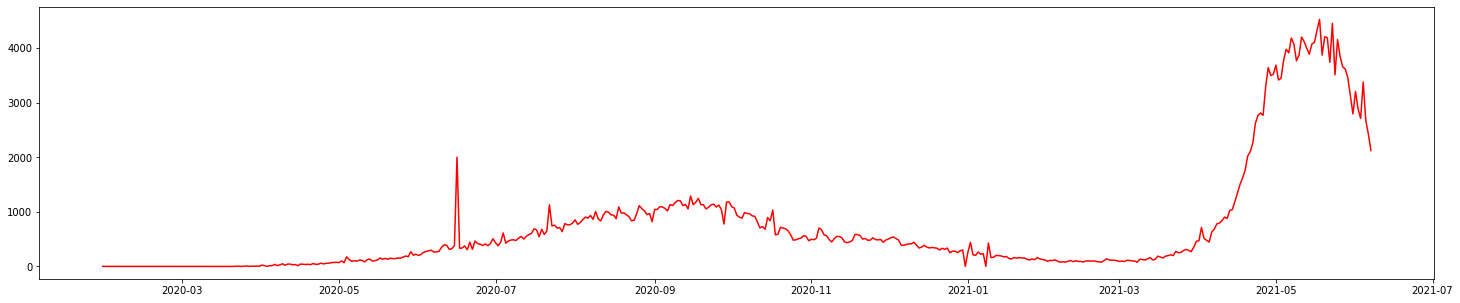

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
#plt.plot(df_ind['date'].sort_values(),df_ind['new_cases'],c='r')

plt.plot(df_ind['date'].sort_values(),df_ind['new_deaths'],c='r')


#plt.plot(df_ind['date'].sort_values(),df_ind['total_vaccinations'])
#plt.plot(df_ind['date'].sort_values(),df_ind['people_fully_vaccinated'])


#plt.plot(df_ind['date'].sort_values,df_ind['new_cases_smoothed'])

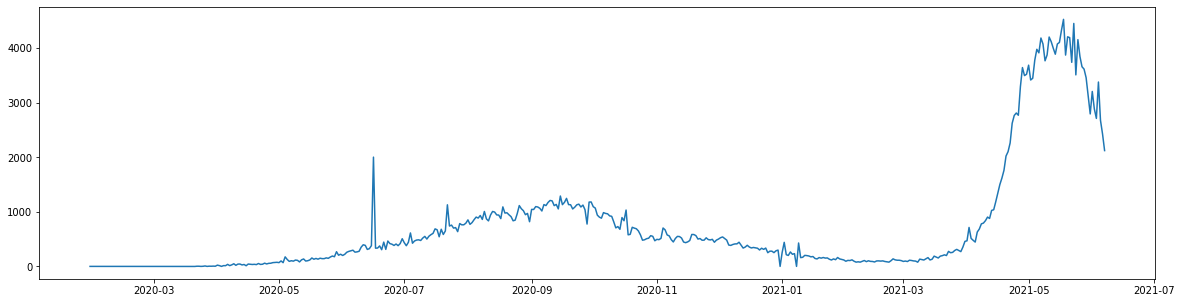

In [30]:
plt.figure(figsize=(20,5))

plt.plot(df_ind['date'].sort_values(),df_ind['new_deaths'].rolling(1).mean())

#plt.plot(df_ind['date'].sort_values(),df_ind['new_cases'].rolling(10).mean())

#plt.plot(df_ind['date'].sort_values(),df_ind['people_fully_vaccinated'].rolling(10).mean())

#plt.plot(df_ind['date'],df_ind['new_cases_smoothed'].rolling(10).mean())


In [31]:

df_ind=df_ind.rename(columns={'new_deaths':'y','date':'ds'})

#df_ind=df_ind.rename(columns={'new_cases':'y','date':'ds'})

#df_ind=df_ind.rename(columns={'people_fully_vaccinated':'y','date':'ds'})


#df_ind=df_ind.rename(columns={'new_cases_smoothed':'y','date':'ds'})
df_ind

,iso_code,location,ds,total_cases,new_cases,new_cases_smoothed,total_deaths,y,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
38928,IND,India,2020-01-30,1.0,1.0,0,0.0,0.0,0.001,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
38929,IND,India,2020-01-31,1.0,0.0,0,0.0,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
38930,IND,India,2020-02-01,1.0,0.0,0,0.0,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
38931,IND,India,2020-02-02,2.0,1.0,0,0.0,0.0,0.001,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
38932,IND,India,2020-02-03,3.0,1.0,0,0.0,0.0,0.002,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39418,IND,India,2021-06-03,28574350.0,132364.0,145556,340702.0,2713.0,20705.985,95.916,105.475,246.885,1.966,2.257,0.0,3725318.0,353782648.0,256.363,2.699,2401899.0,1.741,0.061,16.5,218344384.0,44047467,3.19,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39419,IND,India,2021-06-04,28694879.0,120529.0,137947,344082.0,3380.0,20793.325,87.340,99.962,249.334,2.449,2.233,0.0,3651198.0,357433846.0,259.009,2.646,2627712.0,1.904,0.052,19.0,223607768.0,44434820,3.22,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39420,IND,India,2021-06-05,28809339.0,114460.0,130648,346759.0,2677.0,20876.266,82.942,94.672,251.274,1.940,2.152,0.0,3740296.0,361174142.0,261.720,2.710,2864890.0,2.076,0.046,21.9,225571144.0,44599042,3.23,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645
39421,IND,India,2021-06-06,28909975.0,100636.0,123205,349186.0,2427.0,20949.191,72.924,89.279,253.033,1.759,2.079,0.0,3572380.0,364746522.0,264.308,2.589,3080396.0,2.232,0.040,25.0,228041045.0,44765341,3.24,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645


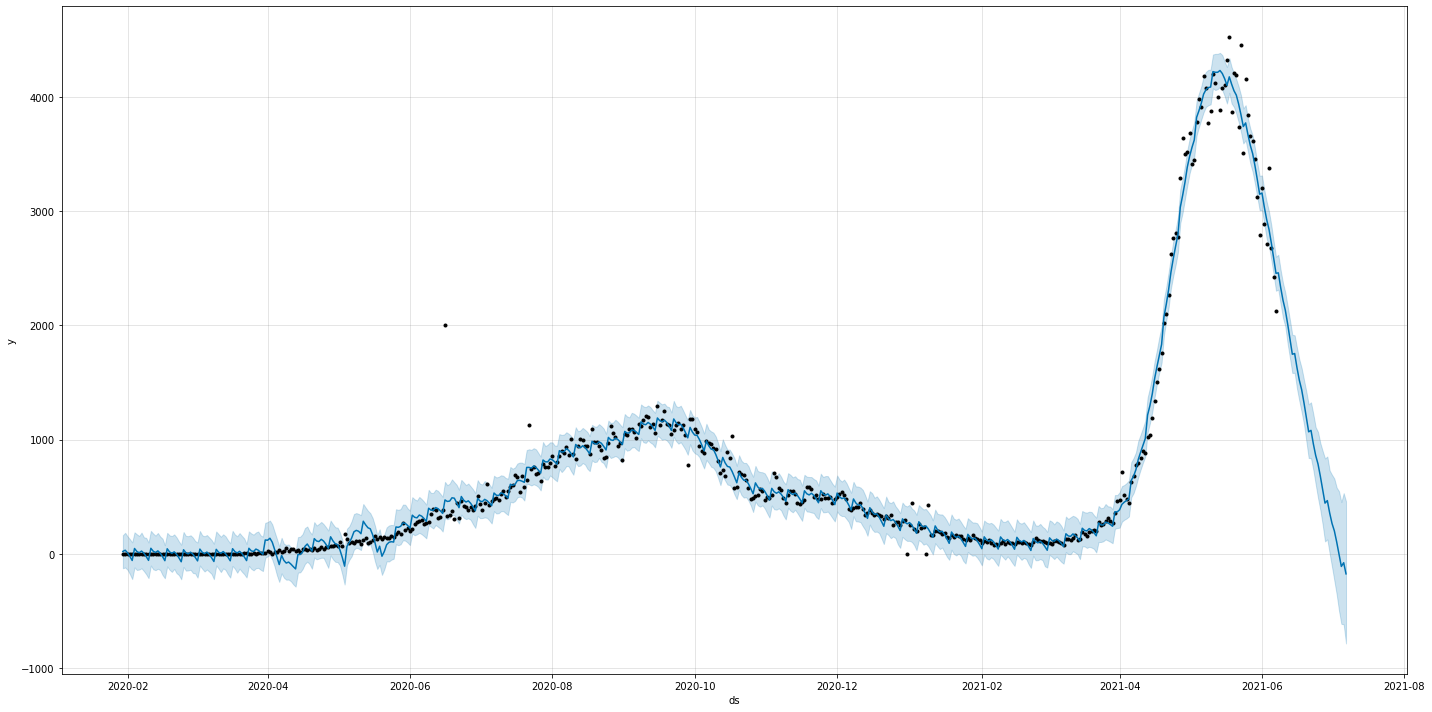

In [32]:
from fbprophet import Prophet
#Forcasting for 30 days
model=Prophet(changepoint_prior_scale=1,daily_seasonality=True,yearly_seasonality=True)
model.fit(df_ind)
x=model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(x)
#pandas plotting
model.plot(forecast,figsize=(20,10));



In [33]:
df2=forecast[['ds','trend','yhat']]
df2.tail(30)

#Trend for 30 days, forecasting from May 7th - declination in cases, yhat * 100 = daily number of cases 

,ds,trend,yhat
495,2021-06-08,-1872.121559,2460.739173
496,2021-06-09,-1889.439966,2332.986970
497,2021-06-10,-1906.758372,2220.560287
498,2021-06-11,-1924.076779,2133.183853
499,2021-06-12,-1941.395186,2012.624131
500,2021-06-13,-1958.713592,1882.101703
501,2021-06-14,-1976.031999,1747.728014
502,2021-06-15,-1993.350406,1753.842402
503,2021-06-16,-2010.668813,1628.931013
504,2021-06-17,-2027.987219,1520.094350


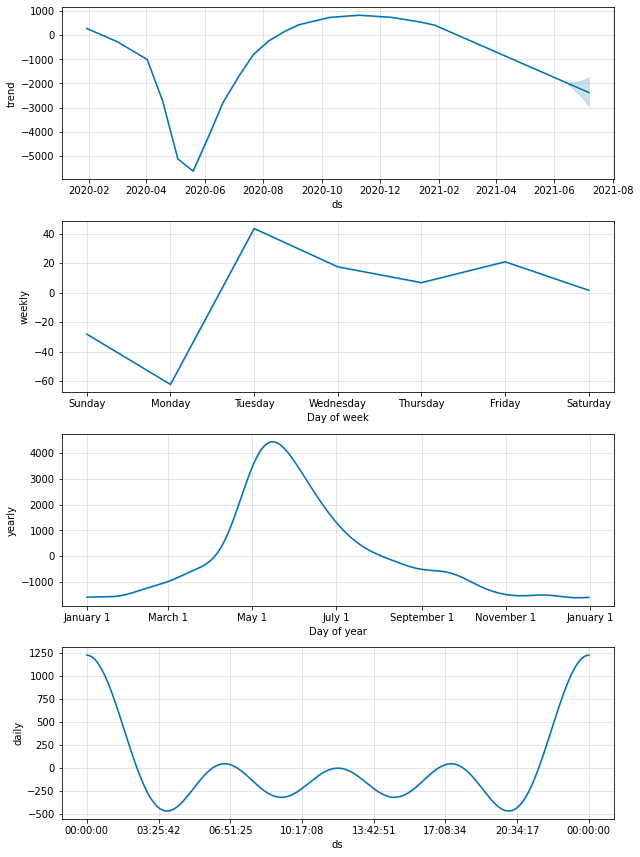

In [34]:
fig2 = model.plot_components(forecast)